# Problem 1

## Load the datasets

In [1]:
import pandas as pd
import numpy as np

table = pd.read_table('./ml-100k/u.data', names=['user_id', 'item_id', 'rating', 'timestamp'], lineterminator='\n')
train = pd.read_table('./ml-100k/ua.base', names=['user_id', 'item_id', 'rating', 'timestamp'], lineterminator='\n')
test = pd.read_table('./ml-100k/ua.test', names=['user_id', 'item_id', 'rating', 'timestamp'], lineterminator='\n')

## Plot the histogram

In [2]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
%matplotlib inline

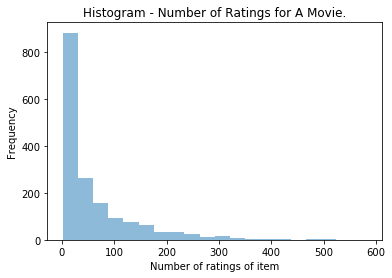

In [3]:
# Set the data
n_item = table['item_id'].max()
n_ratings_item = []

for i in range(1, n_item + 1):
    n = len(table[table["item_id"] == i])
    n_ratings_item.append(n)

# Set the histogram
n, bins, patches = plt.hist(n_ratings_item, 20, alpha = 0.5)

plt.xlabel('Number of ratings of item')
plt.ylabel('Frequency')
plt.title("Histogram - Number of Ratings for A Movie.")

plt.show()

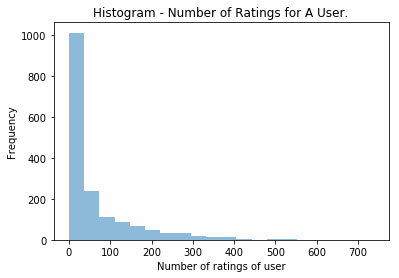

In [4]:
# Set the data
n_user = table['user_id'].max()
n_ratings_user = []

for i in range(1, n_item + 1):
    n = len(table[table["user_id"] == i])
    n_ratings_user.append(n)

# Set the histogram
n, bins, patches = plt.hist(n_ratings_user, 20, alpha = 0.5)

plt.xlabel('Number of ratings of user')
plt.ylabel('Frequency')
plt.title("Histogram - Number of Ratings for A User.")

plt.show()

## Recommender - Baseline Predictor

In [5]:
# Create the user-item matrix
train_matrix = np.zeros((n_user, n_item))
test_matrix = np.zeros((n_user, n_item))

# Fill the matrix with the ratings
def fill_matrix(matrix, data):
    row, col = matrix.shape
    for u in range(1, row + 1):
        items = data[data['user_id'] == u]
        for index in items.index:
            df = items.loc[index]
            i = df['item_id']
            matrix[u - 1, i - 1] = df['rating']  
            
fill_matrix(train_matrix, train)
fill_matrix(test_matrix, test)

In [6]:
# Compute overall average rating
mu = train['rating'].mean()

# Set the values of regularizers
lambda_2 = 25
lambda_3 = 10

# Compute deviation of user and item
def compute(mu, data, lmd, arr, row, r):
    temp = data.copy()
    bias = np.tile(arr, [row, 1])
    flag = data > 0
    temp[flag] = data[flag] - mu - bias[flag]
    ans = temp.sum(axis = r) / (flag.sum(axis = r) + lmd)
    return ans

bi = compute(mu, train_matrix, lambda_2, np.zeros(n_item), n_user, 0)
bu = compute(mu, train_matrix, lambda_3, bi, n_user, 1)

### Part (a) Compute the RMSE for baseline predictor

In [7]:
# Compute the mean square error
import math

def computeRMSE(data, mu, bi, bu):
    user = np.array(data['user_id'])
    item = np.array(data['item_id'])
    rating = np.array(data['rating'])
    
    num = len(rating)
    RMSE_sum = 0
    
    for r in range(num):
        i = item[r]
        u = user[r]
        error = math.pow(mu + bi[i-1] + bu[u-1] - rating[r], 2)
        RMSE_sum += error
        
    RMSE_value = math.pow(RMSE_sum / num, 0.5)
    return RMSE_value

RMSE_test = computeRMSE(test, mu, bi, bu)

print(RMSE_test)

0.9664817838879254


### Part (c) Plot the RMSE per user

In [8]:
# Compute the average rating of each user
avg_user_rating = []
for i in range(1, train["user_id"].max() + 1):
    avg_rating = train[train["user_id"] == i]['rating'].mean()
    avg_user_rating.append(avg_rating)

print(max(avg_user_rating))
print(min(avg_user_rating))

4.92857142857
1.48941176471


In [9]:
# Split the user based on their average rating
max_user_avg = max(avg_user_rating)
min_user_avg = min(avg_user_rating)
step = (max_user_avg - min_user_avg)/5

user_list1 = []
user_list2 = []
user_list3 = []
user_list4 = []
user_list5 = []

for i in range(len(avg_user_rating)):
    if avg_user_rating[i] <= (min_user_avg + step):
        user_list1.append(i+1)
    elif (min_user_avg + step) < avg_user_rating[i] <= (min_user_avg + step * 2):
        user_list2.append(i+1)
    elif (min_user_avg + step * 2) < avg_user_rating[i] <= (min_user_avg + step * 3):
        user_list3.append(i+1)
    elif (min_user_avg + step * 3) < avg_user_rating[i] <= (min_user_avg + step * 4):
        user_list4.append(i+1)
    else:
        user_list5.append(i+1)    

In [10]:
# Compute RMSE based on these subsets of users
# For type 1
rating1 = test[test["user_id"].isin(user_list1)]
RMSE_rating1 = computeRMSE(rating1, mu, bi, bu)
print("Result for RMSE_rating1: ", RMSE_rating1)

# For type 2
rating2 = test[test["user_id"].isin(user_list2)]
RMSE_rating2 = computeRMSE(rating2, mu, bi, bu)
print("Result for RMSE_rating2: ", RMSE_rating2)

# For type 3
rating3 = test[test["user_id"].isin(user_list3)]
RMSE_rating3 = computeRMSE(rating3, mu, bi, bu)
print("Result for RMSE_rating3: ", RMSE_rating3)

# For type 4
rating4 = test[test["user_id"].isin(user_list4)]
RMSE_rating4 = computeRMSE(rating4, mu, bi, bu)
print("Result for RMSE_rating4: ", RMSE_rating4)

# For type 5
rating5 = test[test["user_id"].isin(user_list5)]
RMSE_rating5 = computeRMSE(rating5, mu, bi, bu)
print("Result for RMSE_rating5: ", RMSE_rating5)

Result for RMSE_rating1:  1.108865965786421
Result for RMSE_rating2:  1.1508343053085417
Result for RMSE_rating3:  1.0007633817384751
Result for RMSE_rating4:  0.9264089800064111
Result for RMSE_rating5:  0.8878669173390428


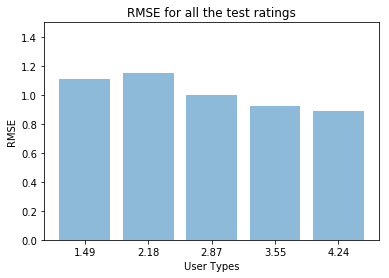

In [11]:
# Plot the histogram for different types of users
RMSE_test_ratings = [RMSE_rating1, RMSE_rating2, RMSE_rating3, RMSE_rating4, RMSE_rating5]
index = np.arange(5)
# plt.figure(figsize=(10, 5))
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('User Types') 
plt.ylabel('RMSE')
plt.title('RMSE for all the test ratings') 
plt.xticks(index, (str(round((min_user_avg),2)), str(round((min_user_avg + step),2)), 
                   str(round((min_user_avg + 2*step),2)), str(round((min_user_avg + 3*step),2)), 
                   str(round((min_user_avg + 4*step),2)))) 
plt.ylim(0,1.5)
plt.show()

## Recommender -  K-nearest neighbor

### Compute the similarity matrix

In [12]:
# Compute the similarity
def similarity(item_1, item_2, data, matrix, rating):
    user_1 = np.array(data[data["item_id"] == item_1]["user_id"]).tolist()
    user_2 = np.array(data[data["item_id"] == item_2]["user_id"]).tolist()
    common = np.intersect1d(user_1, user_2) - 1
    
    if len(common) == 0:
        return 0.00001
    else:
        avg_rating = np.array(rating)[common]
        diff_1 = matrix[common, item_1 - 1] - avg_rating
        diff_2 = matrix[common, item_2 - 1] - avg_rating
        numerator = np.dot(diff_1, diff_2)
        denominator_left = np.dot(diff_1, diff_1)
        denominator_right = np.dot(diff_2, diff_2)
        result = numerator / (math.pow(denominator_left * denominator_right, 0.5) + 0.00001)
        return result

In [13]:
matrix_similarity = np.zeros(shape = (1682, 1682))

print("Computing the similarity matrix...")
for i in range(1682):
    if i % 100 == 0:
        print(i)
        
    for j in range(i,1682):
        if i == j:
            matrix_similarity[i, j] = 0
        else:
            matrix_similarity[i, j] = similarity(i + 1, j + 1, train, train_matrix, avg_user_rating)
print("Done!")
matrix_sim = matrix_similarity + matrix_similarity.T

Computing the similarity matrix...
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
Done!


In [ ]:
np.savetxt('matrix_sim.txt', matrix_sim, delimiter='\t')

### Compute the top k similar items in test

In [14]:
# Compute the top k similar items in test
def topK(train, test, matrix, k):
    user_list = np.array(test['user_id'])
    item_list = np.array(test['item_id'])
    rating = np.array(test['rating'])
    dictionary = {}
    
    for i in range(len(user_list)):
        item = item_list[i]
        user = user_list[i]
        
        user_item = train[train["user_id"] == user]["item_id"].as_matrix()
        similarity = matrix[user_item - 1, item - 1]
        
        top_k_index = np.argsort(-similarity)[:k]
        top_k = user_item[top_k_index]
        
        dictionary[str(user) + "+" + str(item)] = top_k
        
    return dictionary

test_top10 = topK(train, test, matrix_sim, 10)

In [15]:
test_top10

{'1+20': array([ 37, 263, 266, 104, 253, 261, 113,  92,  36, 158]),
 '1+33': array([ 16, 256, 266, 253, 267, 166, 103,  19,  57,  18]),
 '1+61': array([267,  60,  59,  36, 149,  43, 254,  57, 270, 244]),
 '1+117': array([ 75, 119,  18, 125,  31, 161,  27,   6, 257, 126]),
 '1+155': array([ 74, 267, 113,  34,  37,   6, 256, 255, 138, 110]),
 '1+160': array([ 35, 247, 263, 256, 119, 107, 113,  18, 102, 130]),
 '1+171': array([130, 253, 169, 150,  55, 168, 175, 124, 248, 177]),
 '1+189': array([ 18, 119, 113, 114, 267, 169,  92, 126,  48, 223]),
 '1+202': array([119,  18,  34, 115, 246, 114, 204,  73,  75, 228]),
 '1+265': array([267, 119,  18, 224,  79,  22, 144, 157, 174,  28]),
 '2+13': array([296, 295, 276, 309, 258,  14, 277, 305, 242,  25]),
 '2+50': array([296, 302, 313, 127, 272, 285, 316, 315, 100, 257]),
 '2+251': array([242, 302, 127, 315, 272, 303, 296, 311, 100,  14]),
 '2+280': array([309, 291, 310, 274, 255, 307, 278, 289, 299, 284]),
 '2+281': array([309, 255, 289, 295, 28

### Part (a). Compute RMSE for kNN

In [16]:
def computeKNN(train_matrix, test, k, dictionary, matrix_sim):
    user_list = np.array(test['user_id'])
    item_list = np.array(test['item_id'])
    rating_list = np.array(test['rating'])
    
    RMSE_sum = 0
    num_rating = len(rating_list)
    
    for i in range(num_rating):
        
        item = item_list[i]
        user = user_list[i]
        top10 = dictionary[str(user) + "+" + str(item)]
        top10 = top10 - 1
        
        similarity = matrix_sim[item - 1, top10[:k]]
        rating = train_matrix[user - 1, top10[:k]]
        numerator = np.dot(similarity, rating)
        denominator = sum(abs(similarity))
            
        rating_pre = numerator / denominator
        
        error = math.pow(rating_pre - rating_list[i], 2)
        RMSE_sum += error
        
    RMSE_value = math.pow(RMSE_sum / num_rating, 0.5) 
    
    return RMSE_value

In [17]:
RMSE_K_1 = computeKNN(train_matrix, test, 1, test_top10, matrix_sim)
print("Result for RMSE_K_1: ", RMSE_K_1)

RMSE_K_2 = computeKNN(train_matrix, test, 2, test_top10, matrix_sim)
print("Result for RMSE_K_2: ", RMSE_K_2)

RMSE_K_3 = computeKNN(train_matrix, test, 3, test_top10, matrix_sim)
print("Result for RMSE_K_3: ", RMSE_K_3)

RMSE_K_5 = computeKNN(train_matrix, test, 5, test_top10, matrix_sim)
print("Result for RMSE_K_5: ", RMSE_K_5)

RMSE_K_10 = computeKNN(train_matrix, test, 10, test_top10, matrix_sim)
print("Result for RMSE_K_10: ", RMSE_K_10)

Result for RMSE_K_1:  1.3726614162759758
Result for RMSE_K_2:  1.1850424903573005
Result for RMSE_K_3:  1.1179322309306872
Result for RMSE_K_5:  1.075821613842166
Result for RMSE_K_10:  1.3288004469247783


Obviously, k = 5 is the optimal one

### Part (c). Plot the RMSE per user

### k = 1

In [18]:
# For type 1
rating1 = test[test["user_id"].isin(user_list1)]
RMSE_rating1_k_1 = computeKNN(train_matrix, rating1, 1, test_top10, matrix_sim)
print("Result for RMSE_rating1: ", RMSE_rating1_k_1)

# For type 2
rating2 = test[test["user_id"].isin(user_list2)]
RMSE_rating2_k_1 = computeKNN(train_matrix, rating2, 1, test_top10, matrix_sim)
print("Result for RMSE_rating2: ", RMSE_rating2_k_1)

# For type 3
rating3 = test[test["user_id"].isin(user_list3)]
RMSE_rating3_k_1 = computeKNN(train_matrix, rating3, 1, test_top10, matrix_sim)
print("Result for RMSE_rating3: ", RMSE_rating3_k_1)

# For type 4
rating4 = test[test["user_id"].isin(user_list4)]
RMSE_rating4_k_1 = computeKNN(train_matrix, rating4, 1, test_top10, matrix_sim)
print("Result for RMSE_rating4: ", RMSE_rating4_k_1)

# For type 5
rating5 = test[test["user_id"].isin(user_list5)]
RMSE_rating5_k_1 = computeKNN(train_matrix, rating5, 1, test_top10, matrix_sim)
print("Result for RMSE_rating5: ", RMSE_rating5_k_1)

Result for RMSE_rating1:  1.5110702608857516
Result for RMSE_rating2:  1.5748015748023623
Result for RMSE_rating3:  1.4494196903216465
Result for RMSE_rating4:  1.3190415799568913
Result for RMSE_rating5:  1.0954451150103321


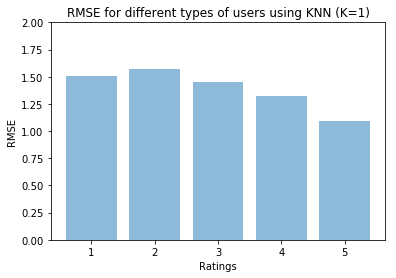

In [19]:
RMSE_test_ratings = [RMSE_rating1_k_1, RMSE_rating2_k_1, RMSE_rating3_k_1, RMSE_rating4_k_1, RMSE_rating5_k_1]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=1)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.show()

### k = 2

In [20]:
# For type 1
rating1 = test[test["user_id"].isin(user_list1)]
RMSE_rating1_k_2 = computeKNN(train_matrix, rating1, 2, test_top10, matrix_sim)
print("Result for RMSE_rating1: ", RMSE_rating1_k_2)

# For type 2
rating2 = test[test["user_id"].isin(user_list2)]
RMSE_rating2_k_2 = computeKNN(train_matrix, rating2, 2, test_top10, matrix_sim)
print("Result for RMSE_rating2: ", RMSE_rating2_k_2)

# For type 3
rating3 = test[test["user_id"].isin(user_list3)]
RMSE_rating3_k_2 = computeKNN(train_matrix, rating3, 2, test_top10, matrix_sim)
print("Result for RMSE_rating3: ", RMSE_rating3_k_2)

# For type 4
rating4 = test[test["user_id"].isin(user_list4)]
RMSE_rating4_k_2 = computeKNN(train_matrix, rating4, 2, test_top10, matrix_sim)
print("Result for RMSE_rating4: ", RMSE_rating4_k_2)

# For type 5
rating5 = test[test["user_id"].isin(user_list5)]
RMSE_rating5_k_2 = computeKNN(train_matrix, rating5, 2, test_top10, matrix_sim)
print("Result for RMSE_rating5: ", RMSE_rating5_k_2)

Result for RMSE_rating1:  1.3731113742871752
Result for RMSE_rating2:  1.4283978782820157
Result for RMSE_rating3:  1.2457298772478758
Result for RMSE_rating4:  1.129670348477745
Result for RMSE_rating5:  0.9875436360937534


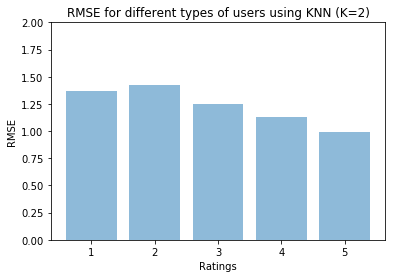

In [21]:
RMSE_test_ratings = [RMSE_rating1_k_2, RMSE_rating2_k_2, RMSE_rating3_k_2, RMSE_rating4_k_2, RMSE_rating5_k_2]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=2)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.show()

### k = 3

In [22]:
# For type 1
rating1 = test[test["user_id"].isin(user_list1)]
RMSE_rating1_k_3 = computeKNN(train_matrix, rating1, 3, test_top10, matrix_sim)
print("Result for RMSE_rating1: ", RMSE_rating1_k_3)

# For type 2
rating2 = test[test["user_id"].isin(user_list2)]
RMSE_rating2_k_3 = computeKNN(train_matrix, rating2, 3, test_top10, matrix_sim)
print("Result for RMSE_rating2: ", RMSE_rating2_k_3)

# For type 3
rating3 = test[test["user_id"].isin(user_list3)]
RMSE_rating3_k_3 = computeKNN(train_matrix, rating3, 3, test_top10, matrix_sim)
print("Result for RMSE_rating3: ", RMSE_rating3_k_3)

# For type 4
rating4 = test[test["user_id"].isin(user_list4)]
RMSE_rating4_k_3 = computeKNN(train_matrix, rating4, 3, test_top10, matrix_sim)
print("Result for RMSE_rating4: ", RMSE_rating4_k_3)

# For type 5
rating5 = test[test["user_id"].isin(user_list5)]
RMSE_rating5_k_3 = computeKNN(train_matrix, rating5, 3, test_top10, matrix_sim)
print("Result for RMSE_rating5: ", RMSE_rating5_k_3)

Result for RMSE_rating1:  1.3111708225280103
Result for RMSE_rating2:  1.3464001343471315
Result for RMSE_rating3:  1.1687501971256042
Result for RMSE_rating4:  1.0701585527758861
Result for RMSE_rating5:  0.940353205245611


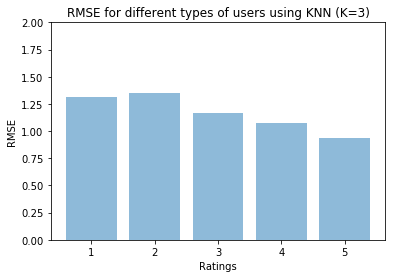

In [23]:
RMSE_test_ratings = [RMSE_rating1_k_3, RMSE_rating2_k_3, RMSE_rating3_k_3, RMSE_rating4_k_3, RMSE_rating5_k_3]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=3)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.show()

### k = 5

In [24]:
# For type 1
rating1 = test[test["user_id"].isin(user_list1)]
RMSE_rating1_k_5 = computeKNN(train_matrix, rating1, 5, test_top10, matrix_sim)
print("Result for RMSE_rating1: ", RMSE_rating1_k_5)

# For type 2
rating2 = test[test["user_id"].isin(user_list2)]
RMSE_rating2_k_5 = computeKNN(train_matrix, rating2, 5, test_top10, matrix_sim)
print("Result for RMSE_rating2: ", RMSE_rating2_k_5)

# For type 3
rating3 = test[test["user_id"].isin(user_list3)]
RMSE_rating3_k_5 = computeKNN(train_matrix, rating3, 5, test_top10, matrix_sim)
print("Result for RMSE_rating3: ", RMSE_rating3_k_5)

# For type 4
rating4 = test[test["user_id"].isin(user_list4)]
RMSE_rating4_k_5 = computeKNN(train_matrix, rating4, 5, test_top10, matrix_sim)
print("Result for RMSE_rating4: ", RMSE_rating4_k_5)

# For type 5
rating5 = test[test["user_id"].isin(user_list5)]
RMSE_rating5_k_5 = computeKNN(train_matrix, rating5, 5, test_top10, matrix_sim)
print("Result for RMSE_rating5: ", RMSE_rating5_k_5)

Result for RMSE_rating1:  1.3262330242129756
Result for RMSE_rating2:  1.3296076656903437
Result for RMSE_rating3:  1.1092028348600085
Result for RMSE_rating4:  1.0339114791384554
Result for RMSE_rating5:  0.9389476641833695


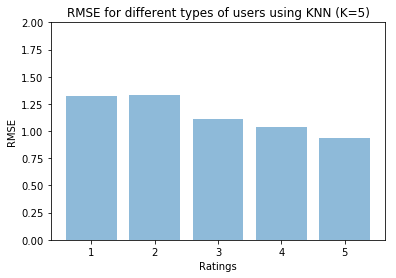

In [25]:
RMSE_test_ratings = [RMSE_rating1_k_5, RMSE_rating2_k_5, RMSE_rating3_k_5, RMSE_rating4_k_5, RMSE_rating5_k_5]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=5)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.show()

### k = 10

In [26]:
# For type 1
rating1 = test[test["user_id"].isin(user_list1)]
RMSE_rating1_k_10 = computeKNN(train_matrix, rating1, 10, test_top10, matrix_sim)
print("Result for RMSE_rating1: ", RMSE_rating1_k_10)

# For type 2
rating2 = test[test["user_id"].isin(user_list2)]
RMSE_rating2_k_10 = computeKNN(train_matrix, rating2, 10, test_top10, matrix_sim)
print("Result for RMSE_rating2: ", RMSE_rating2_k_10)

# For type 3
rating3 = test[test["user_id"].isin(user_list3)]
RMSE_rating3_k_10 = computeKNN(train_matrix, rating3, 10, test_top10, matrix_sim)
print("Result for RMSE_rating3: ", RMSE_rating3_k_10)

# For type 4
rating4 = test[test["user_id"].isin(user_list4)]
RMSE_rating4_k_10 = computeKNN(train_matrix, rating4, 10, test_top10, matrix_sim)
print("Result for RMSE_rating4: ", RMSE_rating4_k_10)

# For type 5
rating5 = test[test["user_id"].isin(user_list5)]
RMSE_rating5_k_10 = computeKNN(train_matrix, rating5, 10, test_top10, matrix_sim)
print("Result for RMSE_rating5: ", RMSE_rating5_k_10)

Result for RMSE_rating1:  1.5014625370243115
Result for RMSE_rating2:  1.8652947366305457
Result for RMSE_rating3:  1.309874412151457
Result for RMSE_rating4:  1.2278478437658313
Result for RMSE_rating5:  1.6483973490014656


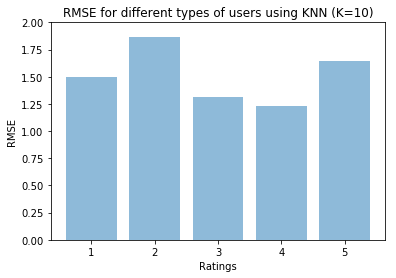

In [27]:
RMSE_test_ratings = [RMSE_rating1_k_10, RMSE_rating2_k_10, RMSE_rating3_k_10, RMSE_rating4_k_10, RMSE_rating5_k_10]
index = np.arange(5)
rects = plt.bar(index, RMSE_test_ratings, alpha=0.5)  

plt.xlabel('Ratings') 
plt.ylabel('RMSE')
plt.title('RMSE for different types of users using KNN (K=10)') 
plt.xticks(index, ('1', '2', '3', '4', '5')) 
plt.ylim(0,2) 

plt.show()